# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

### brief description and questions

- We have chosen to use the provided flights.csv dataset to try and see if we can find any other data sets to combine and analyze in order to find some potential correlations the flights.csv contains straightforward, standard information about flights and gas.csv contains the price/gallon in the united states for the years 95-21
- dataset: [gas.csv source](https://www.kaggle.com/datasets/mruanova/us-gasoline-and-diesel-retail-prices-19952021)
- are there any factors already in the flights.csv file that can be used to predict flight cost
- will fuel in the us be a good way to create an estimate of flight cost
- will a possible combination of some of these attributes be the best predictor of flight cost


In [172]:
import pandas as pd
df = pd.read_csv('flights.csv')
df2 = pd.read_csv('gas.csv')

### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

In [173]:
print("Shape of flights::{}".format(df.shape))
print("Shape of gas::{}".format(df2.shape), '\n')

#coming back later to add format for datetime
df['datetime'] = pd.to_datetime(df.Date_of_Journey, dayfirst=True)
df2['datetime'] = pd.to_datetime(df2.Date)

print("flights:\n", df.dtypes, "\n\ngas:\n", df2.dtypes, "\n\n")
print("flights:\n", df.describe(), "\n\ngas:\n", df2.describe())

print("min year flights: ", min(df.datetime), "max year flights: ", max(df.datetime))
print("min year gas: ", min(df2.datetime), "max year gas: ", max(df2.datetime))
# print(df.value_counts('datetime'))
print(df.head())
# print(df2.head())
# df2.value_counts('datetime')

Shape of flights::(10683, 13)
Shape of gas::(1361, 14) 

flights:
 Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional Info            object
Price                       int64
Unnamed: 11               float64
Unnamed: 12               float64
datetime           datetime64[ns]
dtype: object 

gas:
 Date                object
A1                 float64
A2                 float64
A3                 float64
R1                 float64
R2                 float64
R3                 float64
M1                 float64
M2                 float64
M3                 float64
P1                 float64
P2                 float64
P3                 float64
D1                 float64
datetime    datetime64[ns]
dtype: object 


flights:
    

### around here is when we decided this might not be a great fit since the gas has only a few dates for 2019

- trying a new datga set [temperatures](https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities?select=city_temperature.csv)
- time to take an initial look at an alternative dataset


In [174]:
df3 = pd.read_csv("city_temperature.csv")
#this is a large dataset so we well go ahead and limit it to the years comparable with the flight dataset
print("flights: ", df.head(10))
print("temps: ", df3.head(10))
df3 = df3.loc[df3['Year'] == 2019]
df3 = df3.loc[df3['Country'] == 'India']
cols=["Year","Month","Day"]
df3['date'] = df3[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df3['datetime'] = pd.to_datetime(df3.date)
print("Shape of temps::{}".format(df3.shape), '\n')
print("min year temps: ", min(df3.datetime), "max year temps: ", max(df3.datetime))
#this mostly seems to check out better than the gas dataset
# df3.value_counts('datetime')

/Users/caleb/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


flights:               Airline Date_of_Journey    Source Destination  \
0             IndiGo      24/03/2019  Banglore   New Delhi   
1          Air India       1/05/2019   Kolkata    Banglore   
2        Jet Airways       9/06/2019     Delhi      Cochin   
3             IndiGo      12/05/2019   Kolkata    Banglore   
4             IndiGo      01/03/2019  Banglore   New Delhi   
5           SpiceJet      24/06/2019   Kolkata    Banglore   
6        Jet Airways      12/03/2019  Banglore   New Delhi   
7        Jet Airways      01/03/2019  Banglore   New Delhi   
8        Jet Airways      12/03/2019  Banglore   New Delhi   
9  Multiple carriers      27/05/2019     Delhi      Cochin   

                   Route Dep_Time  Arrival_Time Duration Total_Stops  \
0              BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3        CCU → NAG 

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

### describing our data we decided to use:

- in addition to the nice write up performed by the kaggle sources available through the provided links ^^, running dtypes and describe on our datasets will provide us with a visual look at just what our data contains. The short version is:
- the flights dataset contains standard flight information such as departure date, path, source, destination, stops, etc. all from flights within india
- our thinking is to associate a second, india temperature dataset (straightforward as well with the main POI being average temp) with this and see if their is a seasonal or daily correlation to the temperature, or maybe just see how these attributes affect or influence each other

In [175]:
print("flights dtypes:\n", df.dtypes, "\n\ntemp dtypes:\n", df3.dtypes, "\n\n")
print("flights describe:\n", df.describe, "\n\ntemp describe:\n", df3.describe(), "\n\n")

flights dtypes:
 Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional Info            object
Price                       int64
Unnamed: 11               float64
Unnamed: 12               float64
datetime           datetime64[ns]
dtype: object 

temp dtypes:
 Region                    object
Country                   object
State                     object
City                      object
Month                      int64
Day                        int64
Year                       int64
AvgTemperature           float64
date                      object
datetime          datetime64[ns]
dtype: object 


flights describe:
 <bound method NDFrame.describe of            Airline Date_of_Journey    Source Destination  \
0           IndiG

### Part 3 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

In [176]:
#df.merge(df3, how='outer', on='datetime')
##realized the above line is an issue and had to condense the temperatures so there were no duplicate flight rows
#print(df3.shape) #confirming size change to a year of temps

temps = df3.groupby('datetime', as_index=False)['AvgTemperature'].mean()
#temps.shape #confirming size change to a year of temps
flights = df;
#temps and flights are now the useful dfs for usability
#proper merge if the result has <= # of values of the original flights df
flights['nothing']=flights.groupby('datetime').cumcount()
temps['nothing']=temps.groupby('datetime').cumcount()
print("does this size: ", flights.shape)
merged = flights.merge(temps, how='outer').drop('nothing',1)
print("match this size: ", merged.shape)
# it does not so find out what is being weird
#merged.describe
#get rid of the flights that don't exist
import math
merged = merged[merged['Airline'].notna()]
print("now does it match: ", merged.shape)
#hurray
print("hurray")
merged.head(10)

does this size:  (10683, 15)
match this size:  (11008, 15)
now does it match:  (10683, 15)
hurray


/var/folders/95/26qj32v942397y_qp7ntg9j00000gn/T/ipykernel_9675/3246182119.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  merged = flights.merge(temps, how='outer').drop('nothing',1)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Unnamed: 11,Unnamed: 12,datetime,AvgTemperature
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898.0,NaN,NaN,2019-03-24,83.425
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663.0,NaN,NaN,2019-05-01,89.775
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883.0,NaN,NaN,2019-06-09,93.275
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219.0,NaN,NaN,2019-05-12,89.425
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303.0,NaN,NaN,2019-03-01,73.375
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3874.0,NaN,NaN,2019-06-24,87.875
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11088.0,NaN,NaN,2019-03-12,80.025
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22271.0,NaN,NaN,2019-03-01,NaN
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11088.0,NaN,NaN,2019-03-12,NaN
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8626.0,NaN,NaN,2019-05-27,91.150


### Part 4 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well.

<AxesSubplot:>

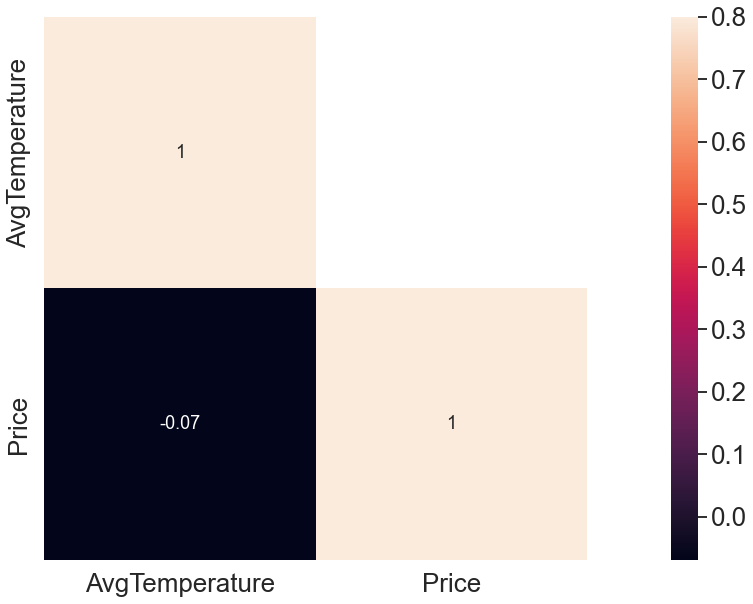

In [177]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import datetime

# setting params same code as the bike dataset
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

#this all needs to be moved into categories
merged['Month'] = pd.DatetimeIndex(merged['datetime']).month
merged['Day'] = pd.DatetimeIndex(merged['datetime']).day

merged['Month'] = merged.Month.astype('category')
merged['Airline'] = merged.Airline.astype('category')
merged['Source'] = merged.Source.astype('category')
merged['Destination'] = merged.Destination.astype('category')

corrMatt = merged[["AvgTemperature",
                   "Price"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

#well this correlation turned out to be far less than I thought it was going to be so lets look at some other graphs

### Monthly Distribution of Prices via box and whiskers

- this plot really sucks but it shows me that the currency is most likely the rupee since the medians seem to be around 10k rupees or $\$130 and the max is around 80k rupees or $\$1000 which all seems to make since as they are domestic flights. In terms of the monthly separation between the months, it seems to be pretty uniform in price
- then look at the same plot for daily values

[Text(0.5, 1.0, 'Monthly Distribution of Prices')]

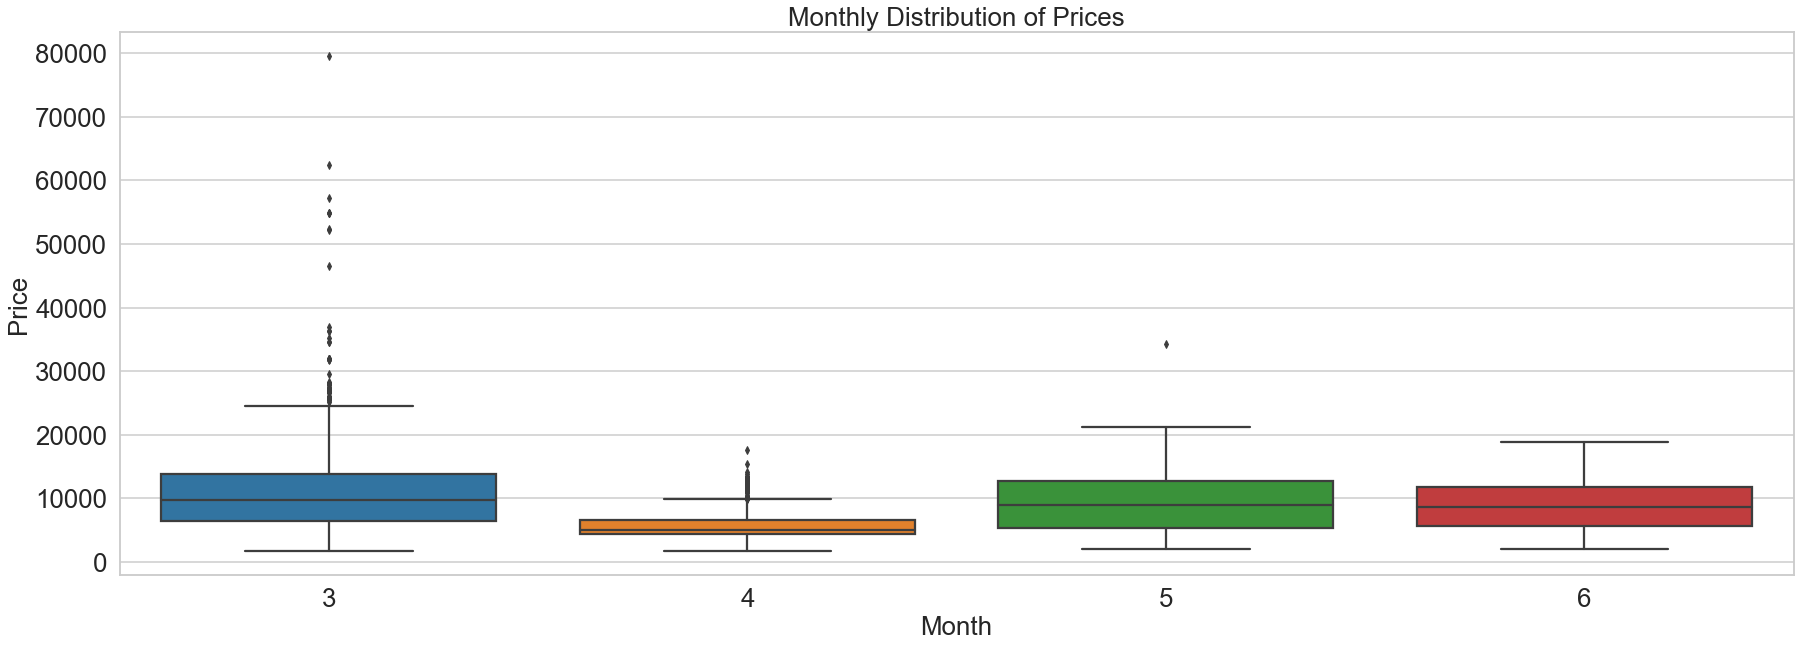

In [178]:
fig,ax = plt.subplots()
sn.boxplot(data=merged[['Month','Price']],x="Month",y="Price",ax=ax)
ax.set(title="Monthly Distribution of Prices")

[Text(0.5, 1.0, 'Daily Distribution of Prices')]

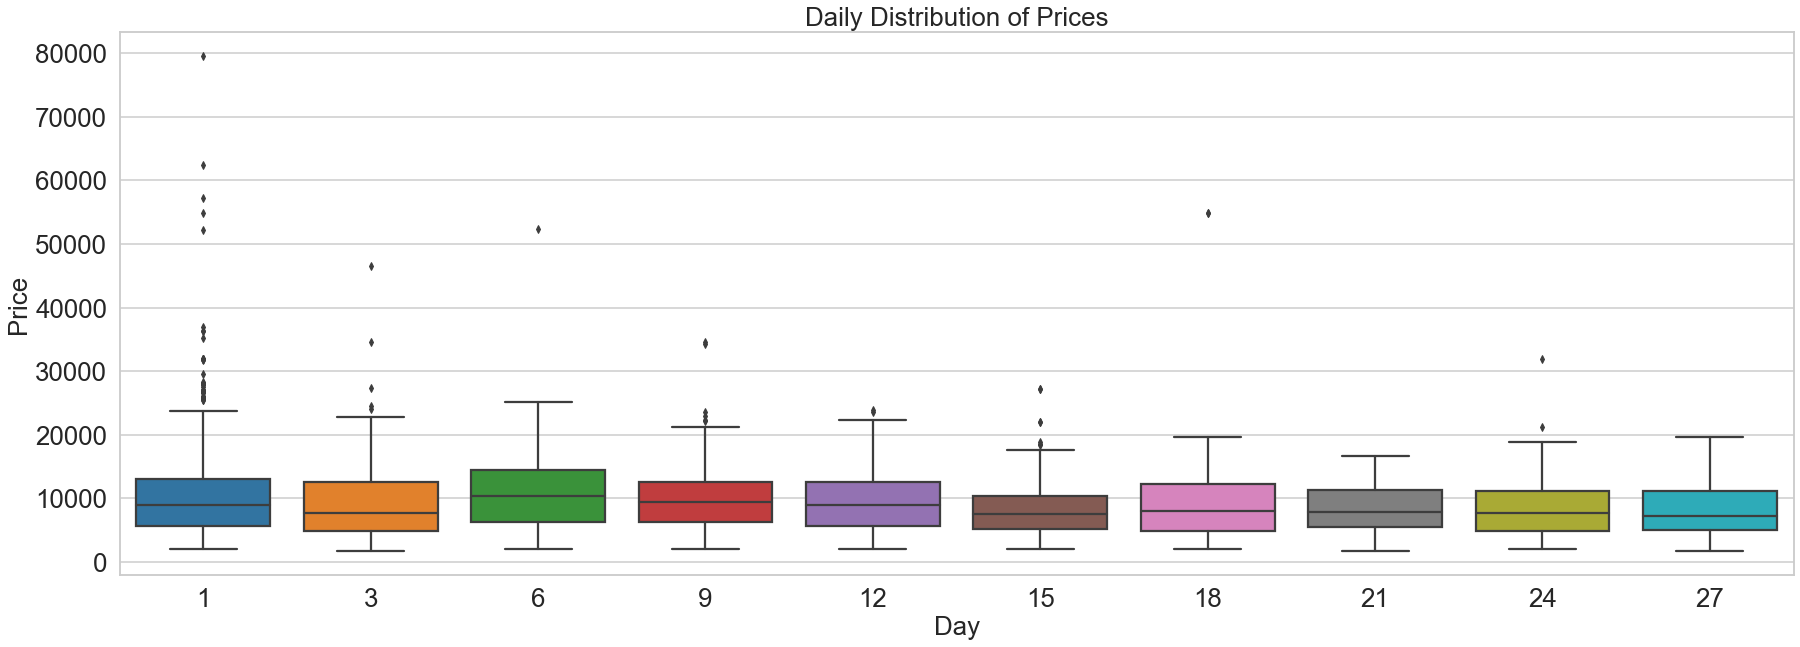

In [179]:
fig,ax = plt.subplots()
sn.boxplot(data=merged[['Day','Price']],x="Day",y="Price",ax=ax)
ax.set(title="Daily Distribution of Prices")

### Look at a different type of graph but the same information

[Text(0.5, 1.0, 'Monthly Distribution of Prices')]

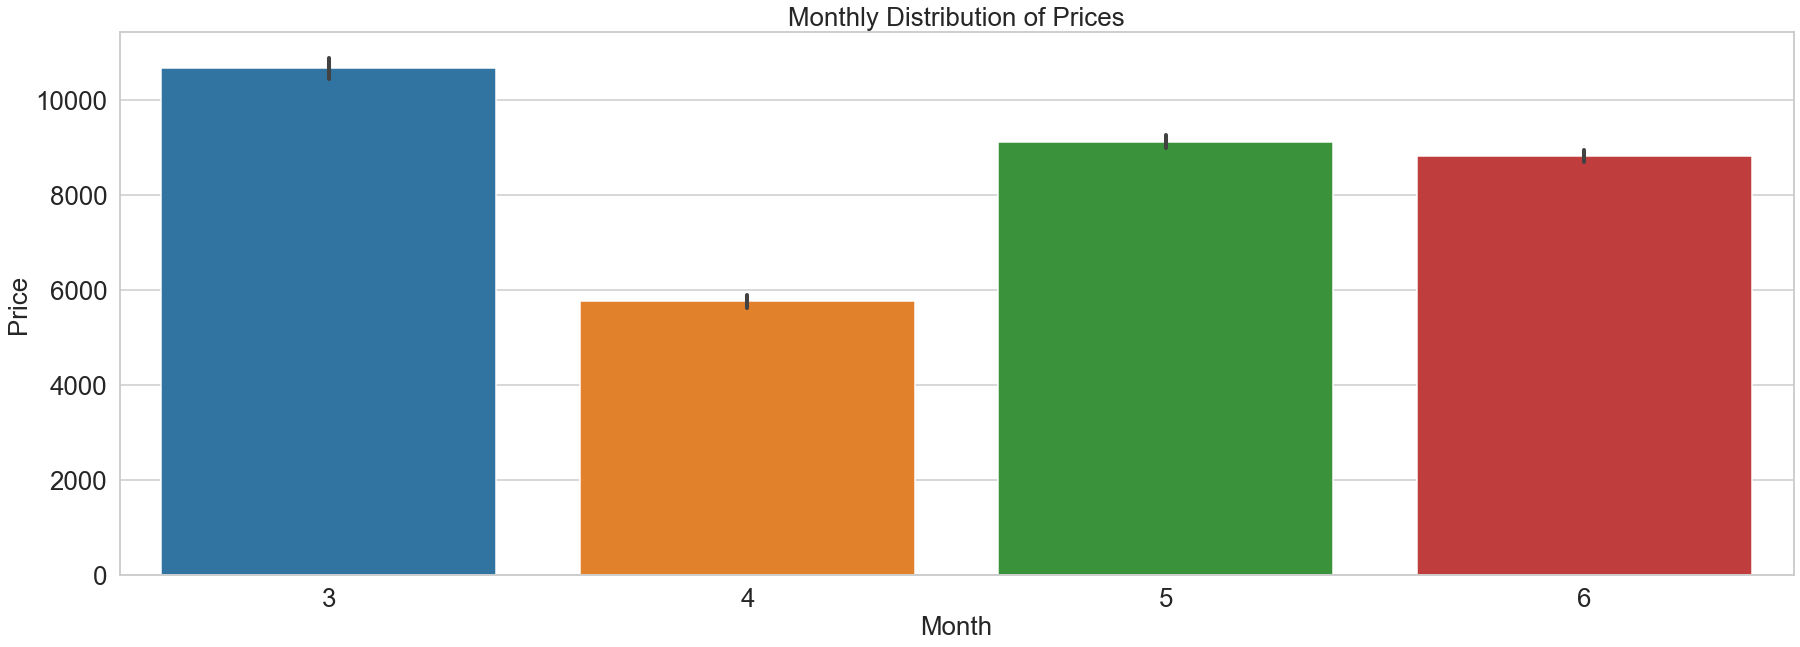

In [180]:
fig,ax = plt.subplots()
sn.barplot(data=merged[['Month',
                         'Price']],
           x="Month",y="Price")
ax.set(title="Monthly Distribution of Prices")

[Text(0.5, 1.0, 'Daily Distribution of Prices')]

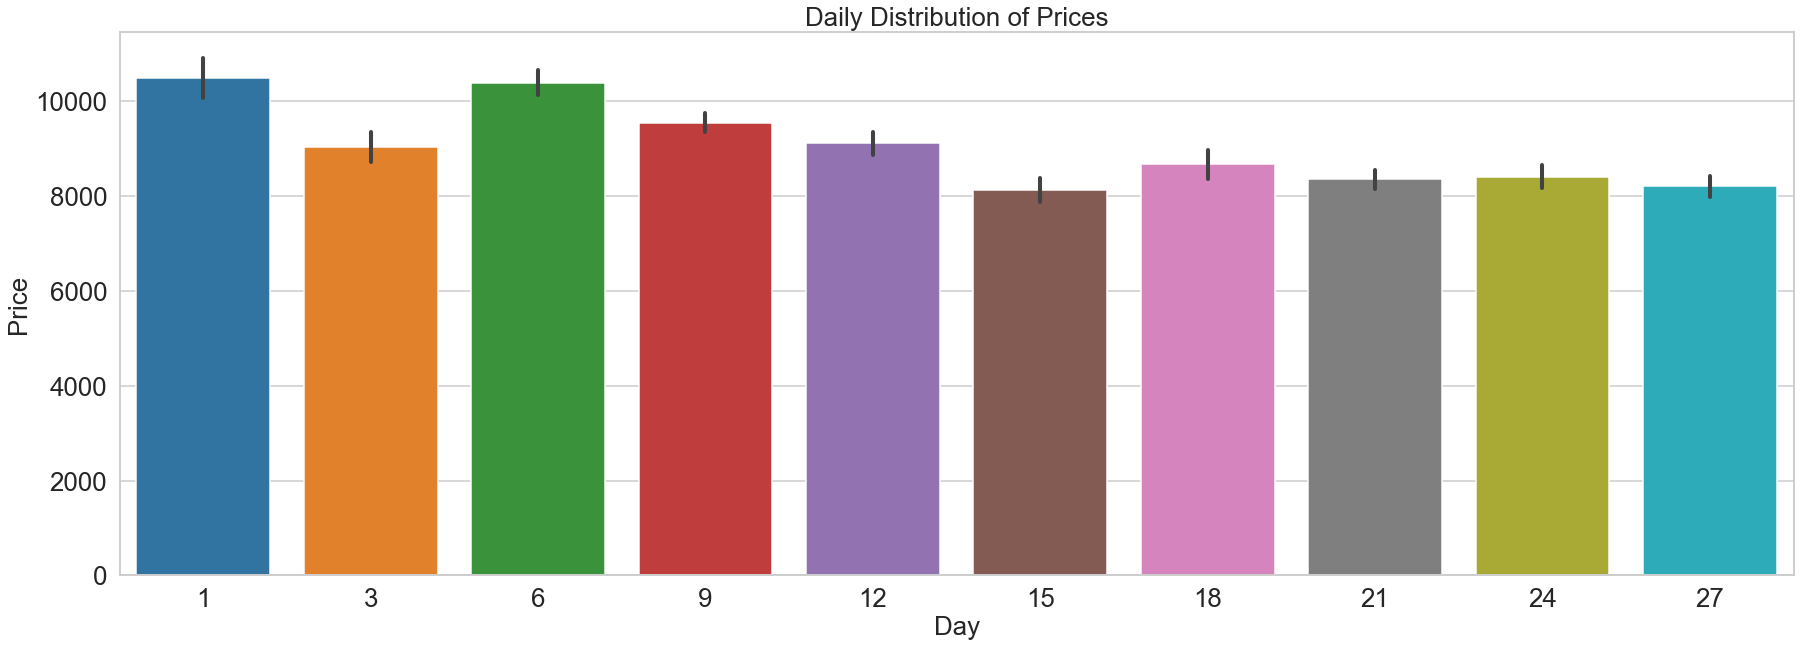

In [181]:
fig,ax = plt.subplots()
sn.barplot(data=merged[['Day',
                        'Price']],
           x="Day",y="Price")
ax.set(title="Daily Distribution of Prices")

[Text(0.5, 1.0, 'Month-based Daily Distribution of Prices')]

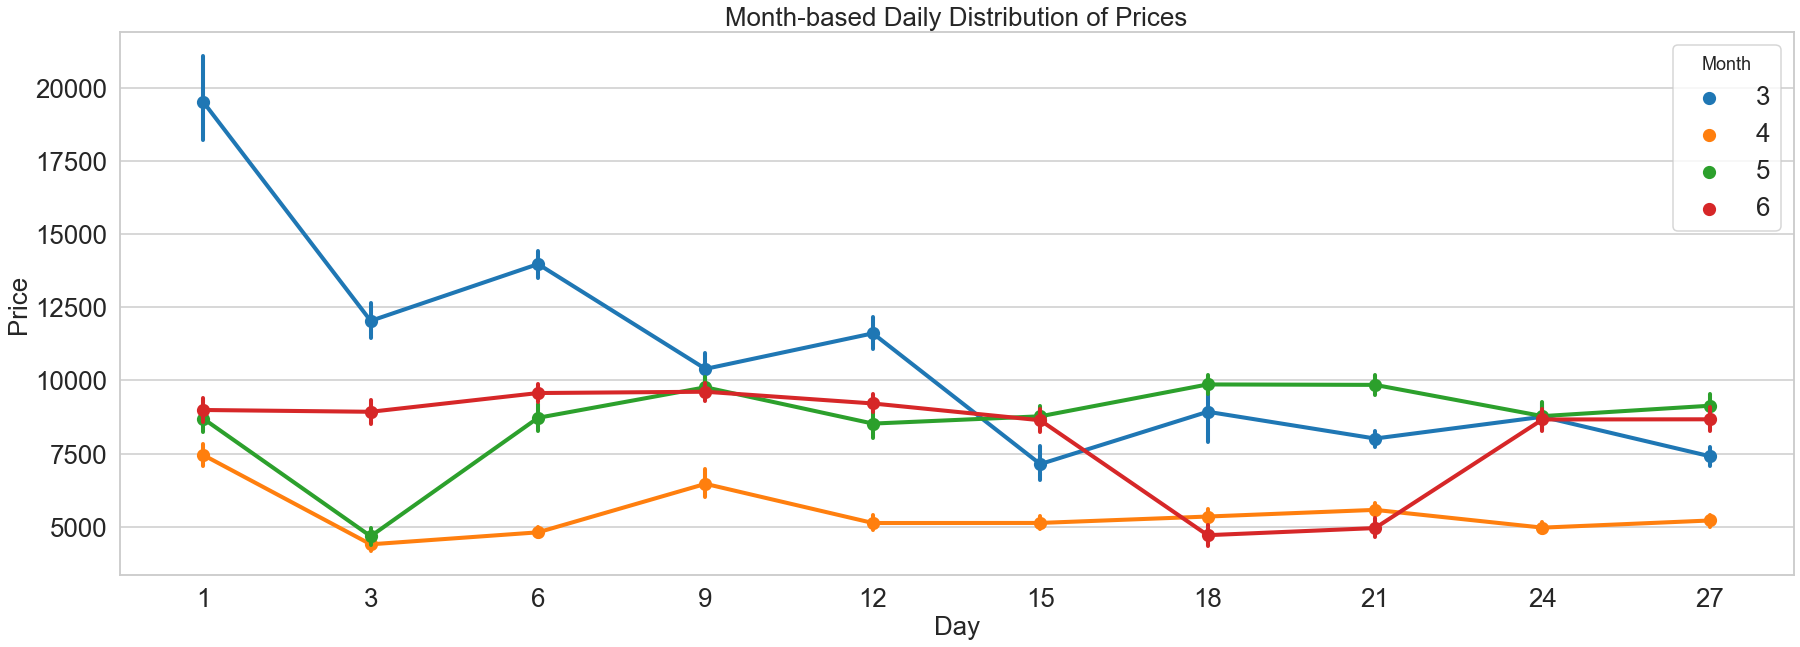

In [182]:
fig,ax = plt.subplots()
sn.pointplot(data=merged[['Day',
                          'Price',
                          'Month']],
             x='Day',y='Price',
             hue='Month',ax=ax)
ax.set(title="Month-based Daily Distribution of Prices")